<a href="https://colab.research.google.com/github/kgeneral/pytorch-study/blob/master/Standardization_vs_Minmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

torch.cuda.is_available() # colab runtime type 만 GPU 로 전환하면 인식됨

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
num_data = 1000

x_np = np.random.rand(num_data) * 2.23 #+ (np.random.rand(num_data) * 10.34) + np.random.rand(num_data) * 55.22
x_np = np.append(x_np,np.random.rand(num_data) * 10.34)
x_np = np.append(x_np,np.random.rand(num_data) * 55.34)
x_np = np.append(x_np,[123] * 20)
x_np = np.append(x_np,[124] * 40)
x_np = np.append(x_np,[125] * 10)

x = torch.Tensor(x)
# torch.nn.init.uniform_(tensor, a=0.0, b=1.0)
#x = init.uniform_(torch.Tensor(num_data,1),-15,150)
#x.append(3853)

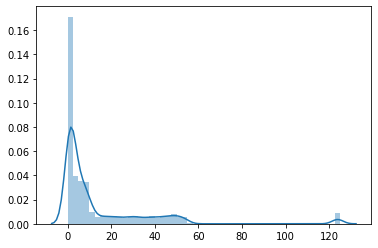

In [84]:
sns.distplot(x)

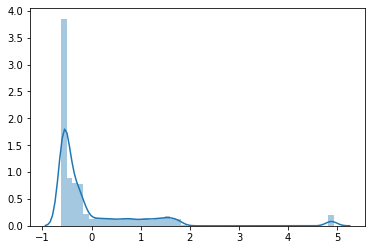

In [85]:
# standardization

mean = x.mean()
std = x.std()
x_std = (x - mean) / std
sns.distplot(x_std)

In [86]:
x_std.mean()

tensor(3.6035e-08)

In [87]:
x_std.std()

tensor(1.)

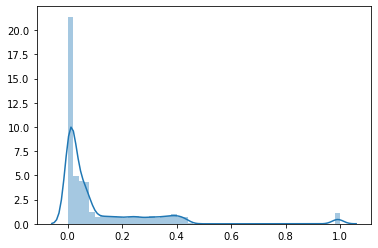

In [88]:
# min-max

min_val = min(x)
max_val = max(x)
x_minmax = (x - min_val) / (max_val - min_val)
sns.distplot(x_minmax)

In [89]:
x_minmax.mean()

tensor(0.1109)

In [90]:
x_minmax.std()

tensor(0.1802)

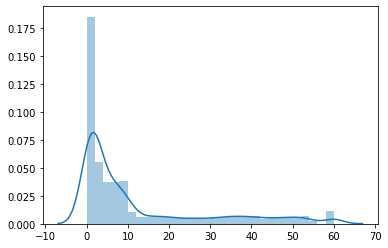

In [94]:
# feature clipping
clipping_max = 60
x_clipped = torch.Tensor(
    [clipping_max if e > clipping_max else e for e in x_np]
) 
sns.distplot(x_clipped)